In [166]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

from os import listdir
from os.path import isfile, join 
path = "./data/data_IRS"
files = pd.Series([(path + "/" + f) for f in listdir(path) if isfile(join(path, f))])
files = files[files.str.endswith(".csv")]
files

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


0    ./data/data_IRS/17zpallagi.csv
2    ./data/data_IRS/12zpallagi.csv
3    ./data/data_IRS/18zpallagi.csv
4    ./data/data_IRS/11zpallagi.csv
5    ./data/data_IRS/14zpallagi.csv
6    ./data/data_IRS/13zpallagi.csv
7    ./data/data_IRS/16zpallagi.csv
9    ./data/data_IRS/15zpallagi.csv
dtype: object

In [169]:
import re
fi = []
for f in files:
    print(f)
    df = pd.read_csv(f, index_col = None, header = 0)
    df["year"] = "20" + re.split("/", f)[3][:2]
    print(df.shape)
    fi.append(df)

./data/data_IRS/17zpallagi.csv
(166537, 154)
./data/data_IRS/12zpallagi.csv
(166904, 78)
./data/data_IRS/18zpallagi.csv
(165935, 154)
./data/data_IRS/11zpallagi.csv
(167334, 74)
./data/data_IRS/14zpallagi.csv
(166722, 128)
./data/data_IRS/13zpallagi.csv
(166740, 115)
./data/data_IRS/16zpallagi.csv
(179796, 148)
./data/data_IRS/15zpallagi.csv
(166698, 132)


In [170]:
soi0= pd.concat(fi, axis = 0)
# convert year variable to datetime format
soi0['year'] = [datetime.strptime(x, "%Y").year for x in soi0['year']]

In [171]:
#The same variables are not collected every year
soi0.isnull().any(axis = 0)

STATEFIPS    False
STATE        False
zipcode       True
agi_stub      True
N1           False
             ...  
N85330        True
A85330        True
RAL           True
n21020        True
a21020        True
Length: 177, dtype: bool

In [172]:
soi1 = soi0[["STATE","agi_stub","zipcode","N18500","A18500", "N19300", "A19300","year"]]
soi2 = soi1.rename(columns={"N18500":"N_returns_real_estate_taxes",
                    "A18500":"Real_estate_taxes_amount",
                     "N19300":"N_returns_mortgage_interest_paid",
                      "A19300":"Mortgage_interest_paid_amount"})
soi2 = soi2.dropna()

In [175]:
soi2

,STATE,agi_stub,zipcode,N_returns_real_estate_taxes,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,year
0,AL,1.0,0.0,21250.0,20714.0,19200.0,100217.0,2017
1,AL,2.0,0.0,63690.0,56781.0,58050.0,294335.0,2017
2,AL,3.0,0.0,78420.0,76692.0,71730.0,400153.0,2017
3,AL,4.0,0.0,68880.0,78667.0,62990.0,400037.0,2017
4,AL,5.0,0.0,146730.0,228891.0,133120.0,1025909.0,2017
...,...,...,...,...,...,...,...,...
166693,WY,2.0,99999.0,370.0,604.0,300.0,2139.0,2015
166694,WY,3.0,99999.0,490.0,777.0,420.0,3036.0,2015
166695,WY,4.0,99999.0,530.0,879.0,470.0,3649.0,2015
166696,WY,5.0,99999.0,1050.0,2470.0,880.0,8350.0,2015


In [176]:
#remove trailing 0 from zipcodes
soi2["zipcode"] = [int(x) for x in soi2["zipcode"]]

In [177]:
#output zillow home&multifamily index to find 4 metro area zipcodes
metro_ca = pd.read_csv("./data/Zip_Zri_AllHomesPlusMultifamily.csv", index_col = None)
metro = ['Los Angeles-Long Beach-Anaheim', 'San Francisco-Oakland-Hayward','Riverside-San Bernardino-Ontario',\
'Sacramento--Roseville--Arden-Arcade', 'San Diego-Carlsbad']
metro_zips = metro_ca[metro_ca["Metro"].isin(metro)][["RegionName", "City", "State"]]

#output tax data of top 5 metro area 
metro_ca_tax = pd.merge(metro_zips, soi2, left_on = "RegionName", right_on = "zipcode", how = "inner")  \
                .drop(["RegionName"], axis = 1)

In [178]:
metro_ca_tax.head()

,City,State,STATE,agi_stub,zipcode,N_returns_real_estate_taxes,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,year
0,San Francisco,CA,CA,1.0,94109,130.0,864.0,80.0,812.0,2017
1,San Francisco,CA,CA,2.0,94109,200.0,1243.0,130.0,1262.0,2017
2,San Francisco,CA,CA,3.0,94109,300.0,1879.0,220.0,2123.0,2017
3,San Francisco,CA,CA,4.0,94109,400.0,2940.0,290.0,2721.0,2017
4,San Francisco,CA,CA,5.0,94109,1340.0,11176.0,990.0,12312.0,2017


In [183]:
g = metro_ca_tax.groupby(["year","zipcode"])
metro_ca_tax_zipcode = g.sum().reset_index()

In [184]:
metro_ca_tax_zipcode

,year,zipcode,agi_stub,N_returns_real_estate_taxes,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount
0,2013,90001,21.0,1910.0,5712.0,1900.0,17162.0
1,2013,90002,21.0,2070.0,5698.0,2100.0,18397.0
2,2013,90003,21.0,2250.0,6165.0,2290.0,21225.0
3,2013,90004,21.0,2910.0,25109.0,2560.0,45167.0
4,2013,90005,21.0,1060.0,8951.0,980.0,16705.0
...,...,...,...,...,...,...,...
4519,2018,95842,21.0,890.0,2472.0,850.0,7627.0
4520,2018,95843,21.0,2540.0,10746.0,2480.0,26612.0
4521,2018,95864,21.0,3080.0,22955.0,2730.0,44128.0
4522,2018,96146,21.0,120.0,1100.0,120.0,1800.0


In [185]:
#write to local folder
metro_ca_tax_zipcode.to_csv("./data/soi_ca_allzips.csv")

In [207]:
metro_re_wide = metro_ca_tax_zipcode.pivot(index = "year", columns = "zipcode", values = "Real_estate_taxes_amount")

In [208]:
metro_re_wide = metro_tax_wide.dropna(axis = 1)


In [209]:
metro_re_wide

zipcode,90001,90002,90003,90004,90005,90006,90007,90008,90010,90011,...,95833,95834,95835,95838,95841,95842,95843,95864,96146,96150
year,,,,,,,,,,,,,,,,,,,,,
2013,5712.0,5698.0,6165.0,25109.0,8951.0,3901.0,2407.0,13216.0,6912.0,7374.0,...,10354.0,9731.0,26376.0,4053.0,3693.0,4552.0,17188.0,26864.0,1374.0,6735.0
2014,5859.0,6039.0,6402.0,24978.0,8948.0,3988.0,2236.0,14044.0,7799.0,7378.0,...,11061.0,10573.0,29497.0,4450.0,4062.0,4740.0,18362.0,28559.0,1399.0,6933.0
2015,6018.0,6747.0,6895.0,26913.0,9446.0,4050.0,2397.0,15001.0,8162.0,7824.0,...,12294.0,11895.0,32334.0,4878.0,4509.0,5196.0,19460.0,30450.0,1656.0,7821.0
2016,6528.0,7323.0,7262.0,28654.0,10178.0,4055.0,2576.0,15799.0,8322.0,8480.0,...,13174.0,14223.0,34830.0,5562.0,4588.0,5790.0,20906.0,32621.0,1771.0,8479.0
2017,7201.0,8453.0,8385.0,33218.0,11746.0,4728.0,2908.0,18135.0,10259.0,9920.0,...,15191.0,17849.0,38573.0,6845.0,5361.0,6721.0,23284.0,38593.0,1922.0,10320.0
2018,3583.0,4013.0,4273.0,22950.0,8063.0,2918.0,1586.0,14677.0,7105.0,4599.0,...,7401.0,11386.0,21646.0,2683.0,2481.0,2472.0,10746.0,22955.0,1100.0,5528.0


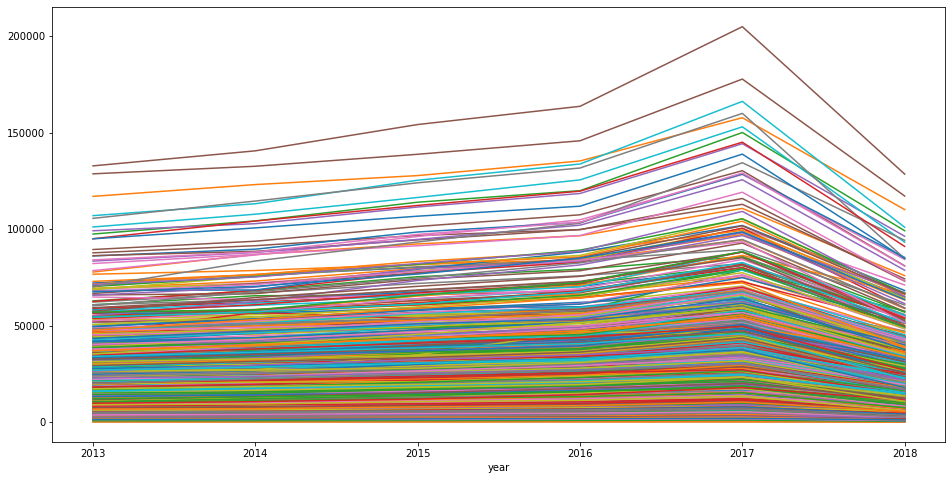

In [206]:
import matplotlib.pyplot as plt
for i in range(metro_tax_wide.shape[1]):
    metro_tax_wide.iloc[:,i].plot(figsize = (16,8))

In [211]:
metro_mtg_wide = metro_ca_tax_zipcode.pivot(index = "year", columns = "zipcode", values = "Mortgage_interest_paid_amount")
metro_mtg_wide = metro_mtg_wide.dropna(axis = 1)

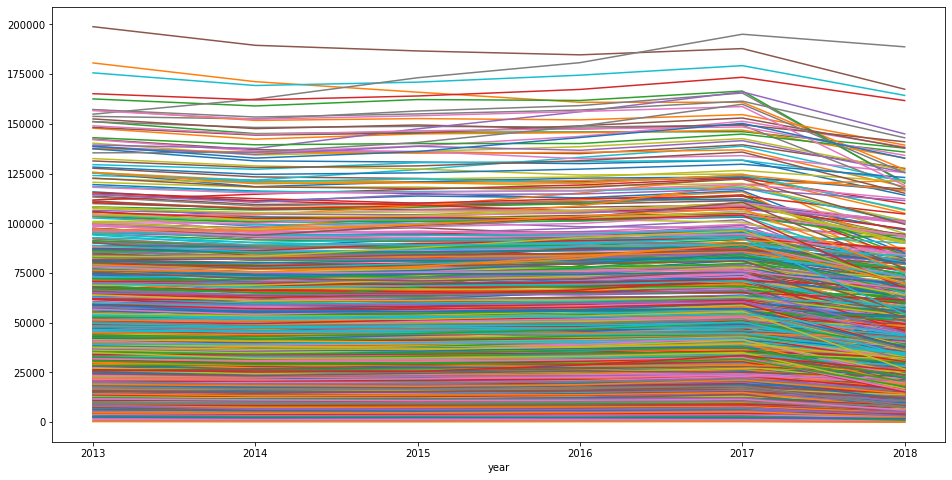

In [212]:
import matplotlib.pyplot as plt
for i in range(metro_mtg_wide.shape[1]):
    metro_mtg_wide.iloc[:,i].plot(figsize = (16,8))